# Deep Learning for Image Classification Assessment


Welcome to your assessment! Follow the instructions in bold below to complete the assessment.

If you get stuck, check out the solutions video and notebook. (Make sure to run the solutions notebook before posting a question to the QA forum please, thanks!)

------------

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [1]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

d:\study\envs\python_cv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\study\envs\python_cv\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
d:\study\envs\python_cv\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
img = x_train[1]

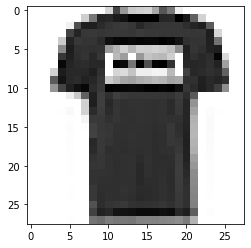

In [4]:
plt.imshow(img,cmap="gray_r")

In [5]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [6]:
x_train.max()

255

In [7]:
x_train = x_train / x_train.max()

In [8]:
x_test = x_test / x_train.max()

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [11]:
x_test = x_test.reshape(10000, 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [12]:
from keras.utils.np_utils import to_categorical

In [13]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [14]:
y_cat_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [15]:
from keras.models import Sequential

In [16]:
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D

In [17]:
model = Sequential()

# Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
# Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# 2D --> 1D
model.add(Flatten())

# Dense layer
model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(x_train,y_cat_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.5407 - accuracy: 0.8097
Epoch 2/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2805 - accuracy: 0.8986
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2365 - accuracy: 0.9148
Epoch 4/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2098 - accuracy: 0.9249
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1940 - accuracy: 0.9311
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1813 - accuracy: 0.9351
Epoch 7/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.1658 - accuracy: 0.9413
Epoch 8/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1530 - accuracy: 0.9453
Epoch 9/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1428 - accuracy: 0.9486
Epoch 10/10
1875/1875 [==============================] - 29s 15m

### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

Epoch 1/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1802 - acc: 0.9365
Epoch 2/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1679 - acc: 0.9395
Epoch 3/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.1579 - acc: 0.9439
Epoch 4/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1502 - acc: 0.9469
Epoch 5/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1427 - acc: 0.9496
Epoch 6/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1397 - acc: 0.9523
Epoch 7/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1312 - acc: 0.9551
Epoch 8/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1274 - acc: 0.9559
Epoch 9/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.1238 - acc: 0.9582
Epoch 10/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.1201 - acc: 0.9588

### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

['loss', 'acc']

             precision    recall  f1-score   support

          0       0.86      0.85      0.85      1000
          1       0.99      0.97      0.98      1000
          2       0.88      0.83      0.85      1000
          3       0.91      0.91      0.91      1000
          4       0.83      0.88      0.85      1000
          5       0.97      0.98      0.98      1000
          6       0.73      0.76      0.74      1000
          7       0.95      0.97      0.96      1000
          8       0.99      0.97      0.98      1000
          9       0.98      0.94      0.96      1000

avg / total       0.91      0.91      0.91     10000



# Great Job!